# representando texto em formato vetorial

instanciando metodos que fara a representacao do texto usando o modelo bag of word

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
dados_reviews = pd.read_csv('dados_reviews_tratados.csv', sep = ',')
dados_reviews['content'] = dados_reviews['content'].fillna('')
dados_reviews = dados_reviews[~dados_reviews['sentiment'].isin(['surprise', 'fear'])]
vectorizer = CountVectorizer()

In [3]:
dados_reviews.describe()

,reviewId,app_name,content,sentiment_polarity,sentiment
count,2960,2960,2960,2960,2960
unique,2960,10,2960,3,5
top,01e23c15-44bf-46b7-b280-40e880d9d49b,CapCut - Editor de Vídeos,o app de o shopee ser razoável apesar de ser...,negative,disgust
freq,1,300,1,1695,952


In [4]:
BoW_matriz = vectorizer.fit_transform(dados_reviews['content'])
palavras = vectorizer.get_feature_names_out()

In [5]:
BOW_dataframe=pd.DataFrame(BoW_matriz.toarray(),columns=palavras)
BOW_dataframe

,2e,aap,aba,abaixado,abaixar,abaixe,abaixei,abaixeir,abaixem,abaixo,...,ótimo,ótimos,ótir,ônibus,última,últimamente,último,único,úteis,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# treinamento e teste

Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (BOW_dataframe) em um conjunto de teste e outro treinamento. 

In [6]:
textos_bow = BOW_dataframe
categorias = dados_reviews['sentiment'] # as categorias devem estar separadas dos dados de treinamento 
categorias_polaridade = dados_reviews['sentiment_polarity']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(textos_bow, categorias, test_size=0.2) #20% para teste.
X_trainp, X_testp, y_trainp, y_testp = train_test_split(textos_bow, categorias_polaridade, test_size=0.2) #20% para teste.

# X_train contém os 80% dos dados - treinamento
# y_train contém os 80% das categorias (atributo alvo) - treinamento

# X_test contém os 20% dos dados - teste
# y_test contém os 20% das categorias - teste

In [8]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayesp = MultinomialNB()
naive_bayes.fit(X_train, y_train)
naive_bayesp.fit(X_trainp, y_trainp)
predicoes = naive_bayes.predict(X_test)# recebe os 20% dos dados de teste sem as categorias - "escondidas"
predicoesp = naive_bayesp.predict(X_testp)

Como sabemos de antemão a categoria correta do conjunto de teste, vamos avaliar a performance do nosso classificador de notícias Bayesiano

In [9]:
from sklearn.metrics import classification_report
import numpy as np

# Avaliar o desempenho
print("Classification Report para Sentiment:")
print(classification_report(y_test, predicoes, zero_division=0))

#print("Classes em y_test:", np.unique(y_test))
#print("Classes em predicoes:", np.unique(predicoes))
# y_test contém as categorias conhecidas do conjunto de teste usado no método predict().
# predicoes contém as categorias preditas (retornadas) pelo método predict() com base nos dados de X_test.

print("Classification Report para Sentiment Polarity:")
print(classification_report(y_testp, predicoesp, zero_division=0))


Classification Report para Sentiment:
              precision    recall  f1-score   support

       anger       0.64      0.57      0.60       145
     disgust       0.62      0.67      0.64       203
   happiness       0.73      0.34      0.46        56
     neutral       0.00      0.00      0.00        16
     sadness       0.63      0.81      0.71       172

    accuracy                           0.63       592
   macro avg       0.52      0.48      0.48       592
weighted avg       0.62      0.63      0.62       592

Classification Report para Sentiment Polarity:
              precision    recall  f1-score   support

    negative       0.80      0.86      0.83       331
     neutral       0.00      0.00      0.00        21
    positive       0.78      0.76      0.77       240

    accuracy                           0.79       592
   macro avg       0.53      0.54      0.53       592
weighted avg       0.76      0.79      0.78       592



Vamos montar a matriz de confusão usando um mapa de valor da biblioteca Seaborn

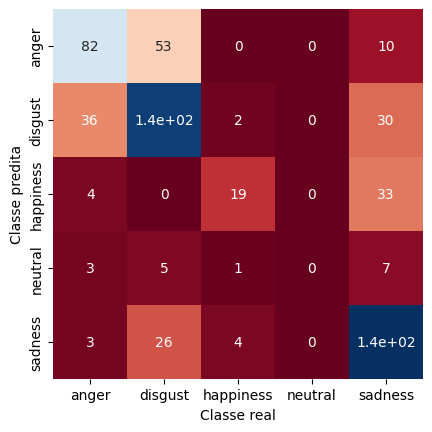

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels = sorted(categorias.unique())

cm = confusion_matrix(y_test, predicoes)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, 
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()


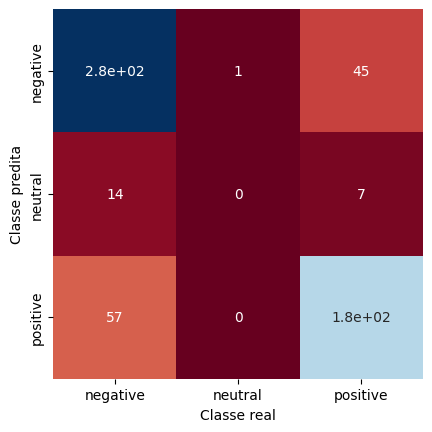

In [17]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_testp, predicoesp)

# Obter os rótulos das classes em ordem
labelsp = sorted(categorias_polaridade.unique())

# Criar o heatmap da matriz de confusão
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, 
            xticklabels=labelsp,
            yticklabels=labelsp)

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

# Teste para uma nova avaliação
Vamos supor que o classificador acima seja o melhor de todos, isto é, você fez vários testes de pré-processamento e testou diferentes formas de representação de texto (features). Tendo isso em vista, agora vem a parte legal que é testar esse classificador em notícias diferentes de qualquer uma existente na base de treinamento. Porém, antes disso, precisamos treinar o classificador em toda a base de notícias que montamos anteriormente. Isso porque nos testes de performance, separamos os dados em treino e teste com a intenção de simular o comportamento do algoritmo. Por isso, vamos treinar o classificador bayesiano em toda a base agora: 

In [12]:
naive_bayes = MultinomialNB()
naive_bayes.fit(textos_bow, categorias)

MultinomialNB()

In [13]:
import pandas as pd

teste_emocoes = pd.read_csv('teste_tratado.csv', sep = ',')
teste_emocoes

,numero,content,sentiment_polarity,sentiment,app
0,1,último vez pedir algo app realmente último pra...,negative,disgust,iFood
1,2,péssimo suporte troquei celular acesso número ...,negative,sadness,iFood
2,3,gostar nubank conseguir desenvolver bom relaci...,positive,happiness,Nubank
3,4,bom navegador usei realmente bloqueia todo pro...,positive,happiness,Brave Mobile
4,5,modificação maldade realmente estuper idiota,negative,anger,Figurinhas do Lula - PT
5,6,app bom algum mercadoria s realmente qualidade...,positive,sadness,Shopee
6,7,problema inicial n conseguir enviar mensagem c...,negative,anger,Shopee
7,8,pra eu bom shopping onliner surgir respeitar c...,positive,happiness,Shopee
8,9,serviço varejo bom sistema frete ótimo funcion...,positive,happiness,Shopee


In [14]:
avaliacao_BoW = vectorizer.transform(teste_emocoes['content'])

In [15]:
emocao_predita = naive_bayes.predict(avaliacao_BoW)

print('emocao predita:')
print(emocao_predita)
print('emocao real:')
print(list(teste_emocoes['sentiment']))

emocao predita:
['anger' 'anger' 'sadness' 'sadness' 'happiness' 'sadness' 'anger'
 'happiness' 'happiness']
emocao real:
['disgust', 'sadness', 'happiness', 'happiness', 'anger', 'sadness', 'anger', 'happiness', 'happiness']


/home/arthurwsl/classificao_textos/Classificacao_textos/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
